### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.


(1) What is the independent variable? What is the dependent variable?

**The independent variable is the type of words - congruent words or incongruent words.
The dependent variable is the time it takes to say the color of the word.**

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**We have two groups since the time is being recorded for two variables.** 

**Group 1: Mean time for congruent words($\mu_{c}$)**<br />
**Group 2: Mean time for incongruent words($\mu_{i}$)**

**Null Hypothesis($H_{0}$): The average time it takes for the congruent words does not exceed the time for incongruent words to be pronounced; there is no difference in mean times between the two types of words.** <br />
**Alternative Hypothesis($H_{1}$): The average time it takes for the congruent words and incongruent words is statistically significant; there is a difference in mean times between the two types of words.**
<center>**$H_{0}$: $\mu_{c}$ = $\mu_{i}$**</center><br />
<center>**$H_{1}$: $\mu_{c}$ != $\mu_{i}$**</center><br />

** We will use a one-tailed t-test for dependent means for this project. We want to know whether there is a difference between the two groups, not which direction the difference is in. This is also dependent because we have the same group undergoing a condition to determine if the condition affects the groups. The independent variable would be the Stroop Effect test and the dependent variable is the time it takes for the groups to pronounce the words. The groups are being measured on the same dependent variable on two occasions to see if there is an effect of the independent variable. **

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#read and load dataframe
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [28]:
#check the number of rows for a later test(degrees of freedom)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [5]:
# compute mean for central tendency
df.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [4]:
# compute difference in means for central tendency
df.mean()[1] - df.mean()[0]

7.9647916666666649

**Measure of Central Tendency: difference in means is 7.9648**

In [2]:
# compute standard deviation for variability
np.std(df, ddof= 1)

Congruent      3.559358
Incongruent    4.797057
dtype: float64

In [3]:
# compute difference in standard deviation for variability
np.std(df['Congruent'] - df['Incongruent'], ddof= 1)

4.8648269103590556

**Measure of Variability: difference in standard deviation is 4.8648**

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

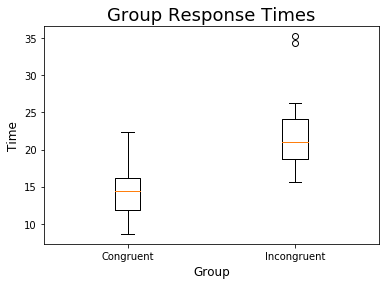

In [4]:
# plot graph and set the labels and titles
plt.boxplot([df['Congruent'], df['Incongruent']])
plt.xlabel('Group', fontsize= 12)
plt.ylabel('Time', fontsize= 12)
plt.title('Group Response Times', fontsize=18)
plt.xticks((1,2), ('Congruent', 'Incongruent'))

# use the magic word
plt.show()

**The boxplot shows that the average time it takes to pronounce the congruent words is less than the incongruent words. There is an outlier on the incongruent group which skews the plot in one direction.**

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [5]:
# perform t-test
stats.ttest_rel(df['Congruent'], df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

In [6]:
# Get the t critical value at 95% confident level
stats.t.ppf(0.05, (len(df)-1))

-1.7138715277470478

**Confidence level = 0.05** <br />

**T-Score= -8.0207**<br />

**p-value= 4.1030e-08(almost zero)**<br />

**Critical value= -1.7138**<br />

**Our p-value is virtually zero, which means that is it is smaller than our confidence level of 0.05. We can conclude that our results are statistically significant and not due to chance. The type of words, congruent or incongruent, have an effect on response times to pronouncing the word.** <br />
**The absolute value of the t-score,8.0207, is higher than the critical value of 1.7138. This means that there is a significant difference between the two groups. We reject the null hypothesis that the two groups have no difference in means. The results of our t-test matches up with our expectations that there is a significant difference between the two groups.** 

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

According to this link[1](https://faculty.washington.edu/chudler/words.html), it states that there are two reasons why the Stroop Effect has an impact on response times.<br /> 
"The words themselves have a strong influence over your ability to say the color. The interference between the different information (what the words say and the color of the words) your brain receives causes a problem. There are two theories that may explain the Stroop effect:<br />
**Speed of Processing Theory:** the interference occurs because words are read faster than colors are named.<br />
**Selective Attention Theory:** the interference occurs because naming colors requires more attention than reading words."

There is a similar everyday use of the Stroop Effect such as going grocery shopping with a list. When you go grocery shopping, walking down the aisles has every item screaming at you to look for any items on your list. You may overlook the item in a sea of items. However, if you list the needed items on a grocery list and follow the list down, it focuses your attention on finding that one particular item in the line of the list. This is the Selective Attention Theory that has an interference effect similar to the Stroop Effect.[2](https://www.thesimpledollar.com/the-stroop-effect-and-your-wallet/)

**References**<br />
[Jupyter subcript](https://stackoverflow.com/questions/46011785/how-to-do-superscripts-and-subscripts-in-jupyter-notebook 
![image.png](attachment:image.png))<br />
[One-tailed test vs two-tailed test](http://www.statisticssolutions.com/should-you-use-a-one-tailed-test-or-a-two-tailed-test-for-your-data-analysis/
![image.png](attachment:image.png))<br />
[Boxplot examples](https://matplotlib.org/examples/pylab_examples/boxplot_demo.html![image.png](attachment:image.png))
[Interpretation of results](http://evafengeva.blogspot.com/2017/09/how-to-interpret-results-of-two-sample.html
![image.png](attachment:image.png))<br />
[T-test statistic function](https://stackoverflow.com/questions/19339305/python-function-to-get-the-t-statistic![image.png](attachment:image.png))<br />
[Explanation of results example](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
![image.png](attachment:image.png))